In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

params={'legend.fontsize':'5','axes.labelsize':'12',
        'axes.titlesize':'12','xtick.labelsize':'12',
        'ytick.labelsize':'12','lines.linewidth':1,
        'axes.linewidth':2,'animation.html': 'html5',
        'figure.figsize':(8,6)}
plt.rcParams.update(params)
plt.rcParams.update({'figure.max_open_warning': 0})
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import scipy.io as sio

from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo.age(1)

import seaborn as sns
import pandas as pd
from astropy.io import fits

sns.set(font_scale=2)
sns.set_style("white", {"axes.grid": "False"})
sns.set_style("ticks")

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

# Step 1: import catalogs and galaxy IDs [and flags]

In [2]:
warnings.filterwarnings('ignore')

candels_cat_z1 = np.loadtxt('../catalogs/CANDELS_GDSS_workshop_z1.dat')

# subtracting 1 from the ID for python indexing
cat_z1_ids = candels_cat_z1[0:,0] - 1
cat_z1_z = candels_cat_z1[0:,1]

print(str(cat_z1_z.shape[0])+' galaxies in the z~1 catalog.')

ircat = np.genfromtxt('../catalogs/CANDELS_GDSS_workshop_z1_fluxes_Jy_UVtoIR.dat')
print(ircat.shape)

# ID      zz                   1
# CTIO_U             eCTIO_U    3        
# VIMOS_U            eVIMOS_U    5       
# ACS_F435W          eACS_F435W   7      
# ACS_F606W          eACS_F606W    9     
# ACS_F775W          eACS_F775W     11    
# ACS_F814W          eACS_F814W      13   
# ACS_F850LP         eACS_F850LP       15 
# WFC3_F098M   eWFC3_F098M   17
# WFC3_F105W         eWFC3_F105W 19       
# WFC3_F125W         eWFC3_F125W   21     
# WFC3_F160W         eWFC3_F160W     23   
# ISAAC_KS           eISAAC_KS         25 
# HAWKI_KS           eHAWKI_KS          27
# IRAC_CH1           eIRAC_CH1          29
# IRAC_CH2           eIRAC_CH2          31
# IRAC_CH3           eIRAC_CH3          33
# IRAC_CH4           eIRAC_CH4          35
# f24            ef24           37
# f70            ef70           39
# f100           ef100          41
# f160           ef160          43
# f250           ef250          45
# flg1   flg2  47


371 galaxies in the z~1 catalog.
(371, 48)


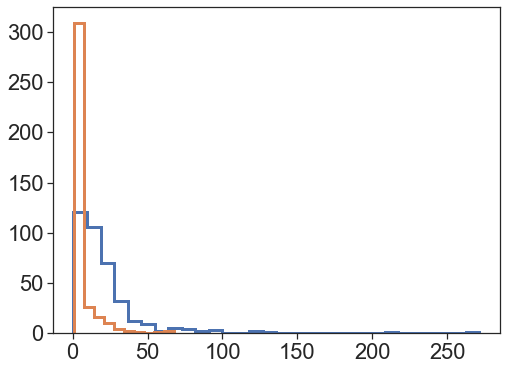

In [3]:
f435_snr = ircat[0:,6]/ircat[0:,7]
f24_snr = ircat[0:,36]/ircat[0:,37]
f100_snr = ircat[0:,40]/ircat[0:,41]
plt.hist(f435_snr,30,histtype='step',lw=3)
plt.hist(f24_snr,10,histtype='step',lw=3)
# plt.hist(f100_snr,50,histtype='step',lw=3)
plt.show()

In [4]:
thrs = 3
print(np.sum((f24_snr>thrs) & (f100_snr>thrs)))
print(np.sum((f24_snr>thrs)))
print(np.sum(f24_snr>0))

63
107
371


# Step 2: import outputs of all the SED fitting codes.

In [5]:
%run import_IR_fits_2020.py

importing BAGPIPES files from Mar 11, 2019
imported CIGALE files (z=1 fits from Oct 2020, z=3 fits from 27 Feb 2019)


# Step 3: Take everyone's data and put it in a dataframe, then start the visualization and analysis.

## define dataframes below for Mass, SFR and dust at z~1. Change the dictionary labels here to change the x-tick labels in the violin- and box-plots.

## change 24 micron SNR threshold by changing [thrs], default = 3

In [6]:
thrs = 3
#mask = (f24_snr>thrs) & (f100_snr>thrs)
mask = (f24_snr>thrs) 


z1_cat_mass_dict = {'Prospector (w/IR, no AGN)':prospector_mass_z1_IR[mask],
                    'Prospector (w/IR, w/AGN)':prospector_mass_z1_IR_AGN[mask],
                    'MAGPHYS (w/IR, no AGN)': magphys_ir_mass[mask],
                    'MAGPHYS (w/IR, w/AGN)': magphys_ir_mass_AGN[mask],
                    'AGNFitter': agnfitter_mass[mask],
                    'BAGPIPES (w/IR)':bagpipes_IR_mass[mask],
                    'CIGALE (w/IR, no AGN)': cigale_ir_mass[mask],
                    'CIGALE (w/IR, w/AGN)': cigale_ir_agn_mass[mask],
                    'SED3FIT (w/IR)':sed3fit_ir_mass[mask]
                   }

z1_cat_mass_noIR_dict = {'Prospector (no IR, no AGN)':prospector_mass_z1[mask], 
                         'MAGPHYS (no IR, no AGN)': magphys_mass_z1[mask],
                         'BAGPIPES (no IR)':bagpipes_mass_z1[mask],
                         'CIGALE (no IR, no AGN)': cigale_mass[mask],
                         'SED3FIT (no IR)':sed3fit_mass[mask],
                        }


z1_cat_mass = pd.DataFrame(data=z1_cat_mass_dict)
z1_cat_mass_noIR = pd.DataFrame(data=z1_cat_mass_noIR_dict)

z1_cat_mass[z1_cat_mass < 7] = np.nan
z1_cat_mass_noIR[z1_cat_mass_noIR < 7] = np.nan


z1_cat_sfr_dict = {'Prospector (w/IR, no AGN)':prospector_sfr_z1_IR[mask],
                    'Prospector (w/IR, w/AGN)':prospector_sfr_z1_IR_AGN[mask],
                    'MAGPHYS (w/IR, no AGN)': magphys_ir_sfr[mask],
                    'MAGPHYS (w/IR, w/AGN)': magphys_ir_sfr_AGN[mask],
                    'AGNFitter': agnfitter_sfr[mask],
                    'BAGPIPES (w/IR)':bagpipes_IR_sfr[mask],
                    'CIGALE (w/IR, no AGN)': cigale_ir_sfr[mask],
                    'CIGALE (w/IR, w/AGN)': cigale_ir_agn_sfr[mask],
                    'SED3FIT (w/IR)':sed3fit_ir_sfr[mask]
                   }

z1_cat_sfr_noIR_dict = {'Prospector (no IR, no AGN)':prospector_sfr_z1[mask], 
                         'MAGPHYS (no IR, no AGN)': magphys_sfr_z1[mask],
                         'BAGPIPES (no IR)':bagpipes_sfr_z1[mask],
                         'CIGALE (no IR, no AGN)': cigale_sfr[mask],
                         'SED3FIT (no IR)':sed3fit_sfr[mask],
                        }

z1_cat_sfr = pd.DataFrame(data=z1_cat_sfr_dict)
z1_cat_sfr_noIR = pd.DataFrame(data=z1_cat_sfr_noIR_dict)

z1_cat_sfr[z1_cat_sfr < -3] = np.nan
z1_cat_sfr_noIR[z1_cat_sfr_noIR < -3] = np.nan


z1_cat_av_dict = {'Prospector (w/IR, no AGN)':prospector_Av_z1_IR[mask],
                    'Prospector (w/IR, w/AGN)':prospector_Av_z1_IR_AGN[mask],
                    'MAGPHYS (w/IR, no AGN)': magphys_ir_av[mask],
                    'MAGPHYS (w/IR, w/AGN)': magphys_ir_av_AGN[mask],
                    'AGNFitter': agnfitter_av[mask],
                    'BAGPIPES (w/IR)':bagpipes_IR_av[mask],
                    'CIGALE (w/IR, no AGN)': cigale_ir_Av[mask],
                    'CIGALE (w/IR, w/AGN)': cigale_ir_agn_Av[mask],
                    'SED3FIT (w/IR)':sed3fit_ir_av[mask]
                   }

z1_cat_av_noIR_dict = {'Prospector (no IR, no AGN)':prospector_Av_z1[mask], 
                         'MAGPHYS (no IR, no AGN)': magphys_Av_z1[mask],
                         'BAGPIPES (no IR)':bagpipes_Av_z1[mask],
                         'CIGALE (no IR, no AGN)': cigale_Av[mask],
                         'SED3FIT (no IR)':sed3fit_av[mask],
                        }

z1_cat_av = pd.DataFrame(data=z1_cat_av_dict)
z1_cat_av_noIR = pd.DataFrame(data=z1_cat_av_noIR_dict)

z1_cat_av[z1_cat_av < 0] = np.nan
z1_cat_av_noIR[z1_cat_av_noIR < 0] = np.nan



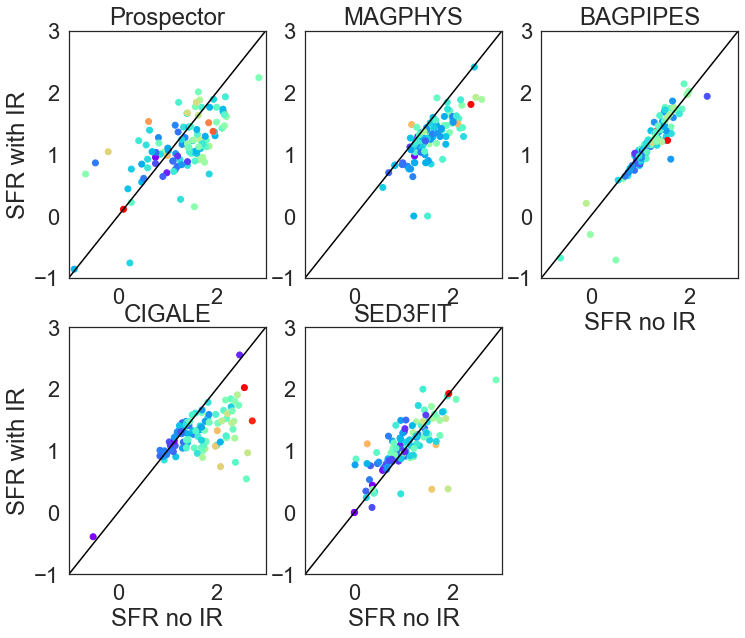

In [8]:
#THIS IS NO-IR vs IR for each code

plt.figure(figsize=(12,10))

plt.subplot(2,3,1)
plt.plot([-5,5],[-5,5],c='black')
plt.scatter(prospector_sfr_z1[mask],prospector_sfr_z1_IR[mask],c=prospector_Av_z1[mask],cmap='rainbow')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("Prospector")
plt.ylabel("SFR with IR")
#plt.xlabel("SFR no IR")

plt.subplot(2,3,2)
plt.plot([-5,5],[-5,5],c='black')
plt.scatter(magphys_sfr_z1[mask],magphys_ir_sfr[mask],c=magphys_Av_z1[mask],cmap='rainbow')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("MAGPHYS")
#plt.xlabel("SFR no IR")

plt.subplot(2,3,3)
plt.plot([-5,5],[-5,5],c='black')
plt.scatter(bagpipes_sfr_z1[mask],bagpipes_IR_sfr[mask],c=bagpipes_Av_z1[mask],cmap='rainbow')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("BAGPIPES")
plt.xlabel("SFR no IR")

plt.subplot(2,3,4)
plt.plot([-5,5],[-5,5],c='black')
plt.scatter(cigale_sfr[mask],cigale_ir_sfr[mask],c=cigale_Av[mask],cmap='rainbow')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("CIGALE")
plt.ylabel("SFR with IR")
plt.xlabel("SFR no IR")

plt.subplot(2,3,5)
plt.plot([-5,5],[-5,5],c='black')
plt.scatter(sed3fit_sfr[mask],sed3fit_ir_sfr[mask],c=sed3fit_av[mask],cmap='rainbow')
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.title("SED3FIT")
plt.xlabel("SFR no IR")

#plt.subplot(2,3,6)
#plt.colorbar(label="A_V no IR")

plt.show()

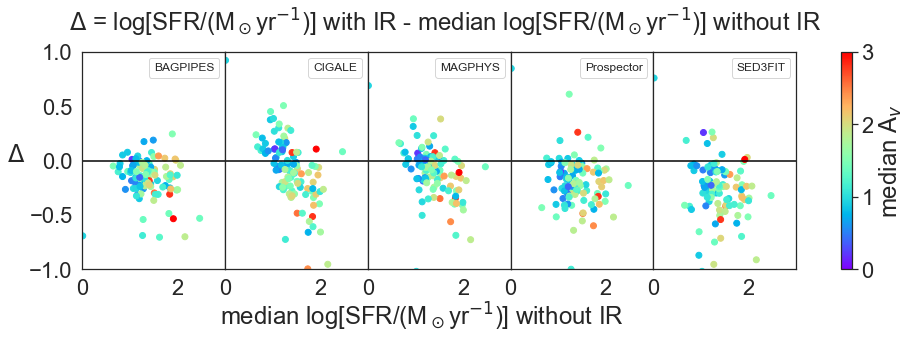

In [16]:
sns.set_style("white", {"axes.grid": "False"})

#THIS IS MEDIAN SFR NO-IR vs IR for each code

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(16,4))
axlist = [ax1,ax2,ax3,ax4,ax5]
fig.subplots_adjust(wspace=0)

for a in [ax2,ax3,ax4,ax5]:
    a.set_yticklabels([])

sfr_z1cat_noIR_50 = np.nanmedian(z1_cat_sfr_noIR,axis=1)
mass_z1cat_noIR_50 = np.nanmedian(z1_cat_mass_noIR,axis=1)
av_z1cat_noIR_50 = np.nanmedian(z1_cat_av_noIR,axis=1)


ax1.plot([-5,5],[0,0],c='black')
first = ax1.scatter(sfr_z1cat_noIR_50,z1_cat_sfr['BAGPIPES (w/IR)']-sfr_z1cat_noIR_50,c=av_z1cat_noIR_50,
                    cmap='rainbow',vmin=0,vmax=3, label='BAGPIPES')
ax1.set_xlim(0,3)
ax1.set_ylim(-1,1)
#ax1.legend(prop={'size': 12})
leg = ax1.legend(handlelength=0, handletextpad=0, fancybox=None, prop={'size': 12})
for item in leg.legendHandles:
    item.set_visible(False)

ax2.plot([-5,5],[0,0],c='black')
ax2.scatter(sfr_z1cat_noIR_50,z1_cat_sfr['CIGALE (w/IR, no AGN)']-sfr_z1cat_noIR_50,
            c=av_z1cat_noIR_50,cmap='rainbow',vmin=0,vmax=3, label="CIGALE")
ax2.set_xlim(0,3)
ax2.set_ylim(-1,1)
#ax2.legend(prop={'size': 12})
leg = ax2.legend(handlelength=0, handletextpad=0, fancybox=None, prop={'size': 12})
for item in leg.legendHandles:
    item.set_visible(False)

ax3.plot([-5,5],[0,0],c='black')
ax3.scatter(sfr_z1cat_noIR_50,z1_cat_sfr['MAGPHYS (w/IR, no AGN)']-sfr_z1cat_noIR_50,
            c=av_z1cat_noIR_50,cmap='rainbow',vmin=0,vmax=3, label="MAGPHYS")
ax3.set_xlim(0,3)
ax3.set_ylim(-1,1)
#ax3.legend(prop={'size': 12})
leg = ax3.legend(handlelength=0, handletextpad=0, fancybox=None, prop={'size': 12})
for item in leg.legendHandles:
    item.set_visible(False)

ax4.plot([-5,5],[0,0],c='black')
ax4.scatter(sfr_z1cat_noIR_50,z1_cat_sfr['Prospector (w/IR, no AGN)']-sfr_z1cat_noIR_50,
            c=av_z1cat_noIR_50,cmap='rainbow',vmin=0,vmax=3, label="Prospector")
ax4.set_xlim(0,3)
ax4.set_ylim(-1,1)
#ax4.legend(prop={'size': 12})
leg = ax4.legend(handlelength=0, handletextpad=0, fancybox=None, prop={'size': 12})
for item in leg.legendHandles:
    item.set_visible(False)

ax5.plot([-5,5],[0,0],c='black')
ax5.scatter(sfr_z1cat_noIR_50,z1_cat_sfr['SED3FIT (w/IR)']-sfr_z1cat_noIR_50,
            c=av_z1cat_noIR_50,cmap='rainbow',vmin=0,vmax=3, label="SED3FIT")
ax5.set_xlim(0,3)
ax5.set_ylim(-1,1)
#ax5.legend(prop={'size': 12})
leg = ax5.legend(handlelength=0, handletextpad=0, fancybox=None, prop={'size': 12})
for item in leg.legendHandles:
    item.set_visible(False)

fig.colorbar(first, ax=axlist, label='median A$_v$')

fig.text(0.42, -0.07, r'median log[SFR/(M$_\odot$yr$^{-1}$)] without IR', ha='center')
fig.text(0.44, 0.95, r'$\Delta$ = log[SFR/(M$_\odot$yr$^{-1}$)] with IR - median log[SFR/(M$_\odot$yr$^{-1}$)] without IR', ha='center')
fig.text(0.06, 0.5, r'$\Delta$')

plt.savefig("../figures/fig5_sfr_noIR_vs_IR.png", dpi=600, bbox_inches='tight')


plt.show()